In [2]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn.decomposition import PCA

/Users/ThomasBayzelon/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv("/Users/ThomasBayzelon/IdeaProjects/Python Work/Assignments/wines_properties.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


# OLS Regression

In [6]:
#defining endog and exog
Y = df["Alcohol"]
X = df.iloc[:, 1:]

#adding constant
X = sm.add_constant(X, prepend = False)

#model fit and summury
model = sm.OLS(Y,X)
results = model.fit()

results.summary()


<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>         <td>Alcohol</td>     <th>  R-squared:         </th> <td>   0.617</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.587</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   20.32</td>
</tr>
<tr>
  <th>Date:</th>             <td>Wed, 12 Dec 2018</td> <th>  Prob (F-statistic):</th> <td>7.07e-28</td>
</tr>
<tr>
  <th>Time:</th>                 <td>18:35:16</td>     <th>  Log-Likelihood:    </th> <td> -129.56</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   178</td>      <th>  AIC:               </th> <td>   287.1</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   164</td>      <th>  BIC:               </th> <td>   331.7</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    13</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
            <td></td>              <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Malic_Acid</th>           <td>    0.1389</td> <td>    0.044</td> <td>    3.146</td> <td> 0.002</td> <td>    0.052</td> <td>    0.226</td>
</tr>
<tr>
  <th>Ash</th>                  <td>    0.0568</td> <td>    0.213</td> <td>    0.267</td> <td> 0.790</td> <td>   -0.363</td> <td>    0.477</td>
</tr>
<tr>
  <th>Ash_Alcanity</th>         <td>   -0.0160</td> <td>    0.019</td> <td>   -0.857</td> <td> 0.393</td> <td>   -0.053</td> <td>    0.021</td>
</tr>
<tr>
  <th>Magnesium</th>            <td>   -0.0002</td> <td>    0.003</td> <td>   -0.072</td> <td> 0.942</td> <td>   -0.007</td> <td>    0.006</td>
</tr>
<tr>
  <th>Total_Phenols</th>        <td>    0.1201</td> <td>    0.132</td> <td>    0.908</td> <td> 0.365</td> <td>   -0.141</td> <td>    0.381</td>
</tr>
<tr>
  <th>Flavanoids</th>           <td>   -0.1747</td> <td>    0.119</td> <td>   -1.465</td> <td> 0.145</td> <td>   -0.410</td> <td>    0.061</td>
</tr>
<tr>
  <th>Nonflavanoid_Phenols</th> <td>   -0.3452</td> <td>    0.424</td> <td>   -0.813</td> <td> 0.417</td> <td>   -1.183</td> <td>    0.493</td>
</tr>
<tr>
  <th>Proanthocyanins</th>      <td>   -0.1243</td> <td>    0.096</td> <td>   -1.294</td> <td> 0.197</td> <td>   -0.314</td> <td>    0.065</td>
</tr>
<tr>
  <th>Color_Intensity</th>      <td>    0.1909</td> <td>    0.028</td> <td>    6.785</td> <td> 0.000</td> <td>    0.135</td> <td>    0.246</td>
</tr>
<tr>
  <th>Hue</th>                  <td>    0.1309</td> <td>    0.275</td> <td>    0.476</td> <td> 0.635</td> <td>   -0.412</td> <td>    0.674</td>
</tr>
<tr>
  <th>OD280</th>                <td>    0.0186</td> <td>    0.116</td> <td>    0.161</td> <td> 0.873</td> <td>   -0.210</td> <td>    0.247</td>
</tr>
<tr>
  <th>Proline</th>              <td>    0.0006</td> <td>    0.000</td> <td>    2.631</td> <td> 0.009</td> <td>    0.000</td> <td>    0.001</td>
</tr>
<tr>
  <th>Customer_Segment</th>     <td>   -0.4922</td> <td>    0.155</td> <td>   -3.166</td> <td> 0.002</td> <td>   -0.799</td> <td>   -0.185</td>
</tr>
<tr>
  <th>const</th>                <td>   12.6359</td> <td>    0.762</td> <td>   16.574</td> <td> 0.000</td> <td>   11.130</td> <td>   14.141</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td> 0.948</td> <th>  Durbin-Watson:     </th> <td>   2.058</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.623</td> <th>  Jarque-Bera (JB):  </th> <td>   0.834</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 0.168</td> <th>  Prob(JB):          </th> <td>   0.659</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 2.997</td> <th>  Cond. No.          </th> <td>1.65e+04</td>
</tr>
</table>

# Logit Regression + Dummies

In [7]:
#finding the 75 percentile limit
np.percentile(df.Alcohol, 75)

13.6775

In [8]:
#setting up dummy variable
df['Threshold'] = np.where(df['Alcohol'] > 13.6775, 1, 0)         #alternatively use 'yes' & 'no' and pd.get_dummies() method

#logit regression
train_cols = df.columns[1:14]
logit = sm.Logit(df['Threshold'], df[train_cols])
result = logit.fit()

#results
print(result.summary2())

#odds ratio
np.exp(result.params)

Optimization terminated successfully.
         Current function value: 0.351051
         Iterations 8
                           Results: Logit
Model:                 Logit             No. Iterations:    8.0000  
Dependent Variable:    Threshold         Pseudo R-squared:  0.379   
Date:                  2018-12-12 18:35  AIC:               150.9741
No. Observations:      178               BIC:               192.3373
Df Model:              12                Log-Likelihood:    -62.487 
Df Residuals:          165               LL-Null:           -100.64 
Converged:             1.0000            Scale:             1.0000  
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Malic_Acid            0.4899   0.2848  1.7202 0.0854 -0.0683  1.0481
Ash                   0.0457   1.3147  0.0347 0.9723 -2.5311  2.6224
Ash_Alcanity         -0.1260

Malic_Acid              1.632139
Ash                     1.046711
Ash_Alcanity            0.881656
Magnesium               0.970091
Total_Phenols           2.733209
Flavanoids              0.370275
Nonflavanoid_Phenols    2.208496
Proanthocyanins         0.863903
Color_Intensity         1.941643
Hue                     5.095196
OD280                   1.195342
Proline                 1.000927
Customer_Segment        0.120901
dtype: float64

# PCA

In [68]:
import seaborn as sns

In [70]:
#removing dummy for PCA
df_pca = df.drop(["Threshold"], axis = 1)

#standardisation
from sklearn.preprocessing import StandardScaler
df_s = StandardScaler().fit_transform(df_pca)

In [71]:
#getting eigenvalues and eigenvectors
covariance_matrix = np.cov(df_s.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

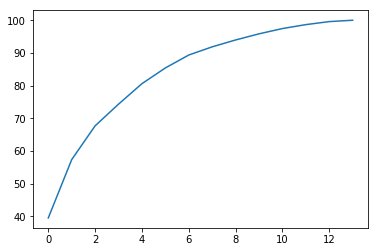

In [72]:
#choosing nb of components
tot_eig_vals = sum(eigen_values)
sorted_eigenvalues = sorted(eigen_values, reverse=True)
variance_explained = [ (i / tot_eig_vals)*100 for i in sorted_eigenvalues ]

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.cumsum(variance_explained))

In [76]:
#creating components
my_pca = PCA(n_components=7)
new_projected_data = my_pca.fit_transform(df_s)

In [79]:
#running logit with new components
logit2 = sm.Logit(df['Threshold'], new_projected_data)
result2 = logit.fit()

#results
print(result2.summary2())

#odds ratio
np.exp(result2.params)

Optimization terminated successfully.
         Current function value: 0.468145
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.172     
Dependent Variable: Threshold        AIC:              180.6595  
Date:               2018-12-11 13:09 BIC:              202.9320  
No. Observations:   178              Log-Likelihood:   -83.330   
Df Model:           6                LL-Null:          -100.64   
Df Residuals:       171              LLR p-value:      5.0984e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.4379      0.0871    -5.0269    0.0000    -0.6086    -0.2672
x2    -0.7824      0.1362    -5.7444    0.0000    -1.0

x1    0.645386
x2    0.457328
x3    0.751030
x4    0.854839
x5    0.503334
x6    0.959987
x7    1.034383
dtype: float64

1. The R-square and the adjusted R-square have a value of 0.617 and 0.587 respectively. This indicates that there is a notable positive relationship between alcohol and the other variables. It is also worthy to mention that a significant amount of variables do not have significant coef. values if we define alpha to be equal to 0.05.

2. Running the logistic regression with the first principal components made the current function value increase by 0.12, from 0.35 to 0.47, which is quite a significant improvement in the model. The coef. values' significance have also improved which strengthen the trustworthiness of the latter model.   